# Matplotlib可视化

### 1 Python 可视化工具 —— Matplotlib 包

#### 特点简介

- 基于 NumPy 数组
- 可与 SciPy 协同工作
- 多平台
- 数据可视化库

### 2 通用 Matplotlib 技巧

#### 2.1 导入 Matplotlib

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 2.2 风格设置

- 采用``plt.style``指令为输出图形选择合适的审美风格
- 如下，设置成``classic``样式

In [32]:
plt.style.use('classic')

#### 2.3 三种使用 Matplotlib 方法

- 脚本
- IPython notebook
- IPython 终端

#### 方法一 —— 从脚本绘图

用脚本绘制图时，函数``plt.show()``是关键

- ``plt.show()`` 开始一个事件循环，遍历所有激活的图形对象，打开一或多个显示图形的交互窗口

例如，假设有以下文件 *myplot.py*

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

从命令行运行，将会生成并显示一个图形窗口

```python
$ python myplot.py
```

``plt.show()`` 命令在后台完成许多与系统的交互工作，有关的细节被隐藏起来

#### 注意事项

- ``plt.show()`` 命令对于每一 Python 对话应只使用一次，而且经常被放在脚本的后部
- <font color="red">多次调用``show()``命令可能导致不可预测的情况，应努力避免</font>

#### 方法二 —— 从 IPython notebook 绘图

- 在 IPython notebook 环境里，首先运行``%matplotlib``命令，可将图形嵌入到 notebook 中
- 常用后端选项
    - ``%matplotlib inline`` 将图形嵌入到 notebook 中
- 其它后端选项
    - 运行 `%matplotlib --list` 查询
    - Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']
    
本节，将一般性地选择通用选项``%matplotlib inline`

#### 方法三 —— 从 IPython Shell 绘图

- 生效该模式，必须一启动 IPython 就运行 ``%matplotlib`` 魔法命令

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```
- 任意``plt``绘图命令将打开一个图形窗口，随后的命令可更新图形
- 图形的变化不会自动画出，要执行``plt.draw()``来强制更新
- 在 Matplotlib 环境下，使用``plt.show()``并不是必要的

#### 本节重点介绍

- 方法二 —— 从 IPython notebook 绘图

In [4]:
%matplotlib inline

运行该命令后，所有绘图格子运行后都会创建一 plot, 并嵌入一 PNG 图片

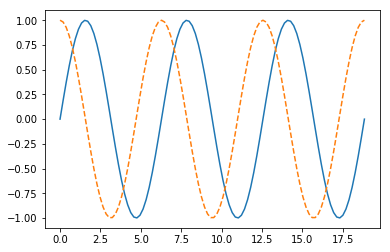

In [5]:
import numpy as np
x = np.linspace(0, 6*np.pi, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### 2.4 保存图形文件

- 运行``savefig(filename)``命令

In [5]:
fig.savefig('my_figure.jpg')
fig.savefig('my_figure.png')
fig.savefig('my_figure.eps')
fig.savefig('my_figure.svg')

In [6]:
!dir my_figure.*

 驱动器 C 中的卷是 Windows
 卷的序列号是 E8C5-B65E

 C:\Users\肖启贤\Downloads 的目录

2018/12/31  14:07            15,020 my_figure.eps
2018/12/31  14:07            46,287 my_figure.jpg
2018/12/31  14:07            32,438 my_figure.png
2018/12/31  14:07            16,463 my_figure.svg
               4 个文件        110,208 字节
               0 个目录 156,414,984,192 可用字节


#### 2.5 显示图形文件

- 使用 IPython 的 Image 对象

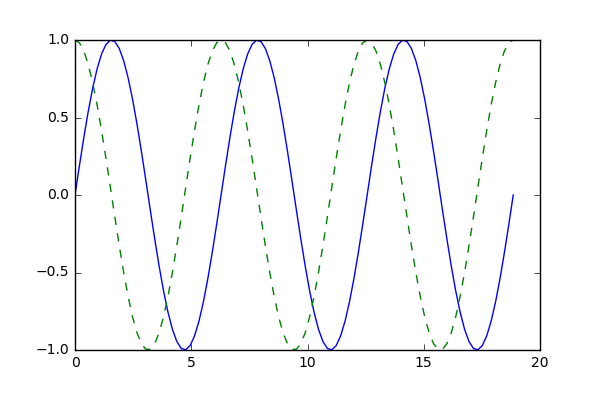

In [7]:
from IPython.display import Image
Image('my_figure.png')

### 3 两类图形接口

- Matlab 风格
- 面向对象风格

#### 3.1 Matlab 风格

- Matplotlib 初衷是为 Matlab 用户设计的，保留了浓厚的 Matlab 风格

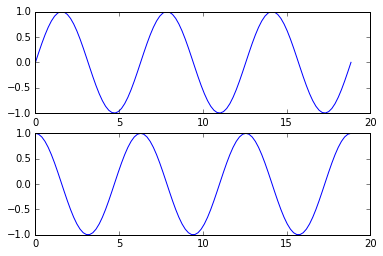

In [8]:
plt.figure()  # 创建画布

# 创建多图之子图一，设置坐标轴
plt.subplot(2, 1, 1) # (行, 列, 子图号)
plt.plot(x, np.sin(x))

# 创建多图之子图二，设置坐标轴
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

#### 问题 —— 画完第二个子图后，如何返回前一个子图呢？

#### 3.2 面向对象接口

- 面向对象接口的绘图函数其实是显式``Figure``和``Axes``对象的方法

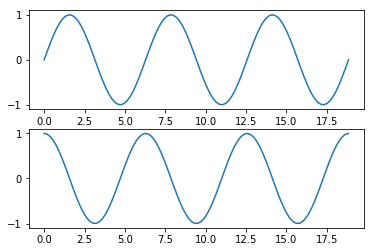

In [8]:
# 先创建多图网格
# ax 将是含 2 个坐标轴对象的数组
fig,ax = plt.subplots(2)

# 对于合适的对象，调用 plot() 方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

#### 3.3 小结

- 对于简单图形，不确定使用哪种接口更好
- 对于复杂图形，使用面向对象接口更好

### 4 简单线图

- 绘制函数 $y = f(x)$ 的图形

### 4.1 准备工作

- 设置 notebook 环境
- 导入必须的包

```python
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
```

### 4.2 创建图和坐标系

- *figure*（``plt.Figure``类的一个实例）是一个包含了坐标系、图形、文本和标签的容器
- *axes*（``plt.Axes``类的一个实例）是一个有边界、刻度和标签的框，它包含了画图元素

```python
fig = plt.figure()
ax = plt.axes()
```

- 坐标系一经建立，就可使用两类接口来画图

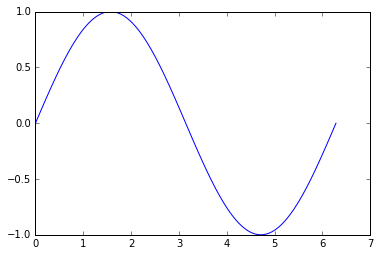

In [13]:
# 如面向对象接口
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 2*np.pi, 100)
ax.plot(x, np.sin(x))

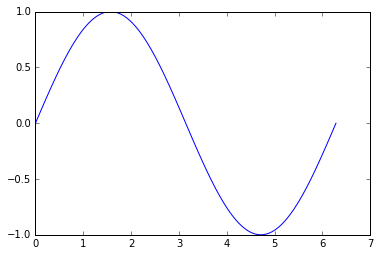

In [14]:
# 或 Matlab 接口
plt.plot(x, np.sin(x))

可以多次调用plot函数，将多条线画在同一个图中

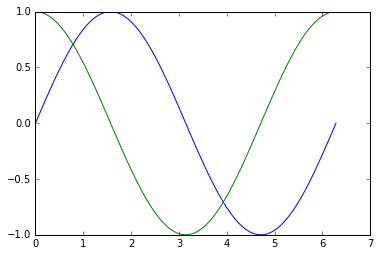

In [15]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### 5 调图

#### 5.1 控制线条颜色

- 采用 `color` 关键字指定
- 颜色缺省情况
    - 如果不指定颜色，Matplotlib 将自动对多条曲线循环使用缺省颜色

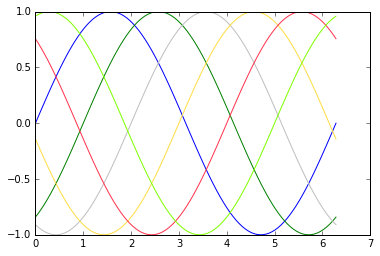

In [16]:
plt.plot(x, np.sin(x - 0), color='blue')        # 指定蓝色
plt.plot(x, np.sin(x - 1), color='g')           # 短色彩码 'g' = 'green' (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # 介于 0 和 1 之间的灰色
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # 16 进制色码 (RRGGBB 从 00 到 FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB 元组，值介于 0 和 1 之间
plt.plot(x, np.sin(x - 5), color='chartreuse'); # 支持所有 HTML 颜色名

#### 5.2  控制线型

- 采用 ``linestyle`` 关键字

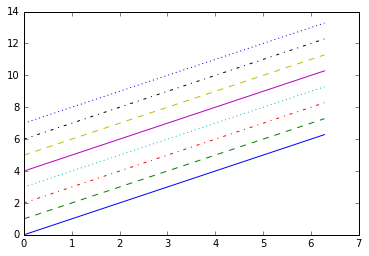

In [17]:
plt.plot(x, x + 0, linestyle='solid')    # 实线
plt.plot(x, x + 1, linestyle='dashed')   # 断续线
plt.plot(x, x + 2, linestyle='dashdot')  # 断续点线
plt.plot(x, x + 3, linestyle='dotted')   # 点线

# 或 符号设置
plt.plot(x, x + 4, linestyle='-')        # 实线
plt.plot(x, x + 5, linestyle='--')       # 断续线
plt.plot(x, x + 6, linestyle='-.')       # 断续点线
plt.plot(x, x + 7, linestyle=':')        # 点线

#### 5.3 合并控制颜色和线型

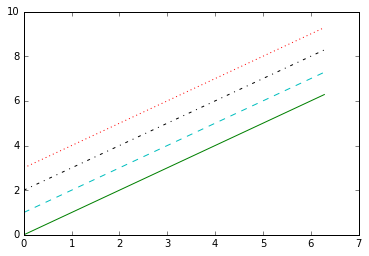

In [18]:
plt.plot(x, x + 0, '-g')   # 绿色   实线
plt.plot(x, x + 1, '--c')  # 蓝绿色 断续线
plt.plot(x, x + 2, '-.k')  # 黑色   断续点线
plt.plot(x, x + 3, ':r');  # 红色   点线

#### 5.4 控制轴限

- 调用方法
    - ``plt.xlim()``
    - ``plt.ylim()``

(-1.2, 1.2)

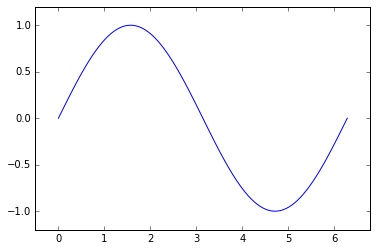

In [19]:
plt.plot(x, np.sin(x))

plt.xlim(-0.5, 2*np.pi + 0.5)
plt.ylim(-1.2, 1.2)

- 统一方法 —— 允许一次设置``x``和``y``的上下限

    - 使用``plt.axis()`` (注意单词拼写是 *axis* 而不是 *axes* )
    - 传递的参数是 **一个列表** ``[xmin, xmax, ymin, ymax]``

[-0.5, 6.783185307179586, -1.2, 1.2]

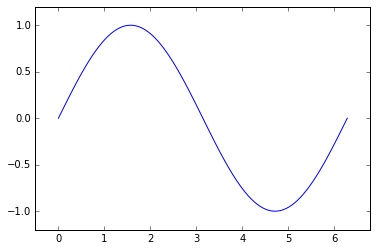

In [20]:
plt.plot(x, np.sin(x))
plt.axis([-0.5, 2*np.pi + 0.5, -1.2, 1.2])

#### 5.5 标记图（Labeling Plots）

标记图包括

- 图题（titles）
- 轴标（axis labels）
- 简单说明（simple legends）

Text(0,0.5,'sin(x)')

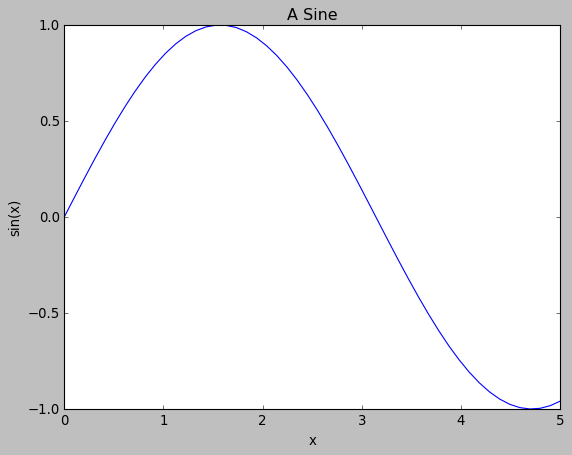

In [36]:
# 图题和轴标
plt.plot(x, np.sin(x))
plt.title("A Sine")
plt.xlabel("x")
plt.ylabel("sin(x)")

#### 5.5.1图中画了多条线时，可使用说明（legend）对每条线进行标记

- 可采用内建的 ``plt.legend()`` 方法
- 也可事先在 ``plot`` 函数中使用 ``label`` 关键字标记，再调用 ``plt.legend()`` 函数为线型、颜色和标注建立关联

如下例

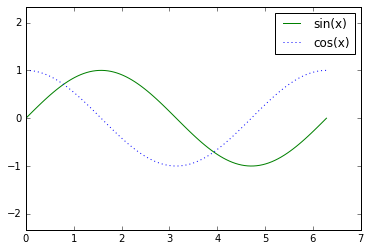

In [22]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

#### 5.5.2 两种接口风格对比

- ``plt.plot()`` → ``ax.plot()``
- ``plt.legend()`` → ``ax.legend()``

以及

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

#### 5.5.3 综合设置

- 使用 ``ax.set()`` 方法一次设置所有属性

[(-1.2, 1.2),
 Text(0,0.5,'sin(x)'),
 (-0.5, 6.783185307179586),
 Text(0.5,0,'x'),
 Text(0.5,1,'A Simple Plot')]

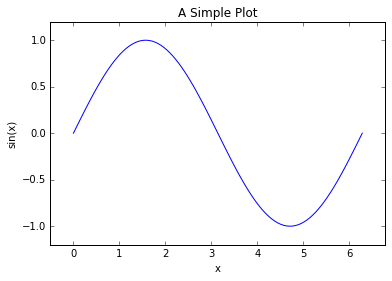

In [23]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5,2*np.pi+0.5), ylim=(-1.2, 1.2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')

### 6 简单散点图

除简单线图以外的另一种常用图形，其特点

- 图点不被线段串连
- 散布在图上
- 形状如：实心点、圆或其它

#### 6.1 用 ``plt.plot`` 画散点图

如前所述

- 可采用 ``plt.plot`` / ``ax.plot`` 绘制线图
- 也可采用这些函数生成散点图

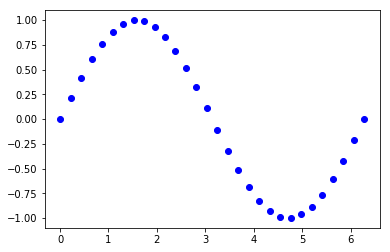

In [10]:
x = np.linspace(0, 2*np.pi, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='blue')

In [11]:
y

array([ 0.00000000e+00,  2.14970440e-01,  4.19889102e-01,  6.05174215e-01,
        7.62162055e-01,  8.83512044e-01,  9.63549993e-01,  9.98533414e-01,
        9.86826523e-01,  9.28976720e-01,  8.27688998e-01,  6.87699459e-01,
        5.15553857e-01,  3.19301530e-01,  1.08119018e-01, -1.08119018e-01,
       -3.19301530e-01, -5.15553857e-01, -6.87699459e-01, -8.27688998e-01,
       -9.28976720e-01, -9.86826523e-01, -9.98533414e-01, -9.63549993e-01,
       -8.83512044e-01, -7.62162055e-01, -6.05174215e-01, -4.19889102e-01,
       -2.14970440e-01, -2.44929360e-16])

#### 6.2 形状参数

简单散点函数

```python
plt.plot(x, y, 'o', color='black')
```

- 函数中的第三个参数是表示散点形状的符号
- 完整的符号列表见 ``Matplotlib 在线文档``

(0, 1.8)

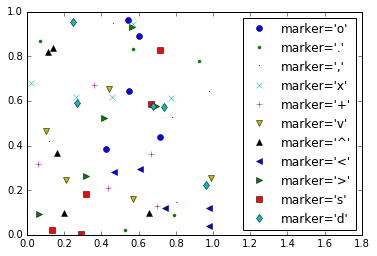

In [25]:
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:    # 各种散点形状
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))

plt.legend(numpoints=1)
plt.xlim(0, 1.8)

- 可在所绘制线图上同时绘制散点

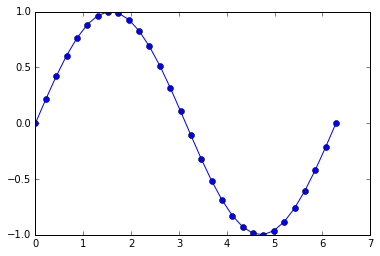

In [26]:
plt.plot(x, y, '-ob')

#### 6.3 用``plt.scatter``画散点图

- 这是更强大的创建散点图方法
- 与``plt.plot`` 函数有许多类似

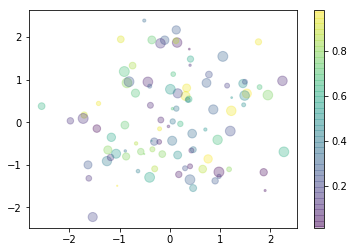

In [16]:
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)   # (0,1)均匀分布，100个元素

sizes = 100*rng.rand(100)#控制每个点的大小的参数

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # 颜色尺度

In [14]:
sizes

array([39.26756765, 95.64057228, 18.71308918, 90.39839549, 54.38059501,
       45.69114216, 88.20414102, 45.86039618, 72.41676366, 39.90253217,
       90.40443929, 69.00250202, 69.96220543, 32.77204016, 75.67786427,
       63.60610554, 24.00202734, 16.05388225, 79.63914745, 95.9166603 ,
       45.81388273, 59.09841653, 85.77226442, 45.72234534, 95.18744768,
       57.5751162 , 82.07671207, 90.88437184, 81.55238188, 15.94144634,
       62.88984391, 39.84342586,  6.2712952 , 42.40322519, 25.86840669,
       84.90383084,  3.33046265, 95.89827219, 35.53688485, 35.67068904,
        1.63285027, 18.52323252, 40.12595008, 92.92914173,  9.96149302,
       94.53015335, 86.94885305, 45.41623969, 32.67008818, 23.27441293,
       61.44647065,  3.30745915,  1.56060644, 42.87957225,  6.8074074 ,
       25.19409882, 22.11609153, 25.31911937, 13.10552312,  1.20362229,
       11.54842971, 61.84802595, 97.42562128, 99.03450016, 40.90540954,
       16.2954426 , 63.87617574, 49.03053465, 98.94097773,  6.53

#### 6.4 对比 ``plt.plot`` 和 ``plt.scatter``

``plt.plot``和``plt.scatter``各有所长

- 对于小量数据，二者难分优劣
- 对于大数据集，``plt.plot``明显更有效率

原因在于

- ``plt.scatter``具有对每个点渲染尺寸、色彩的能力，将带来更多额外的工作
- ``plt.plot``所绘制的点具有统一的特征，外观的确定工作对于整个数据集只需一次

对于大数据集，两种方法的差异将导致巨大的性能差别，有鉴于此，对于大数据集应该优先采用``plt.plot``。

### 7 等高线图

采用二维等高线图或色码域图（color-coded regions）来显示三维数据

#### Matplotlib函数

- ``plt.contour`` 画等高线图
- ``plt.contourf`` 画填充等高线图
- ``plt.imshow`` 显示图片

#### 三维函数实例

演示某三维函数 $z = f(x, y)$ 的等高线图，其中

$$z = f(x,y) = \sin^{10}x + \cos(10+xy)\cos x$$

In [17]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

#### 7.1  用函数``plt.contour``创建等高线图

- 三个调用参数

    - x 网格值
    - y 网格值
    - z 网格值

*x* 和 *y* 值代表图中的位置，*z* 值表示等高线水平值。
    
或许，最直接的准备数据方法是使用``np.meshgrid``函数（从一维数组构造二维网格）。

In [27]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X,Y)


观察这个仅有标准线的等高线图

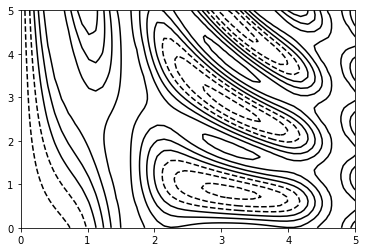

In [28]:
plt.contour(X, Y, Z, colors='black')

#### 7.2 缺省约定

对于单色图

- 虚线代表负值
- 实线代表正值

对于彩色图

- 可采用有色线条，用``cmap``参数指定色图（colormap）

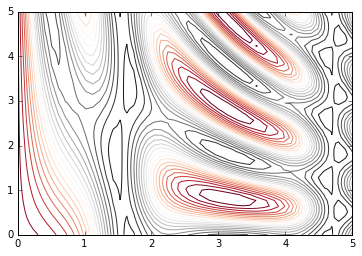

In [31]:
# 参数 20 指定了等间隔区间数
# 参数 cmap 取 RdGy (short for Red-Gray)色图

plt.contour(X, Y, Z, 20, cmap='RdGy')

#### 7.3 用函数 plt.contourf 创建填充等高线图

#### 语法 ( 注意末尾的字母 f )

```python
plt.contourf(X, Y, Z, 20, cmap='RdGy')
```
在很大程度上与 plt.contour 相同

#### 色棒命令 —— 创建一条标记了颜色信息的附加轴——颜色条

```python
plt.colorbar
```

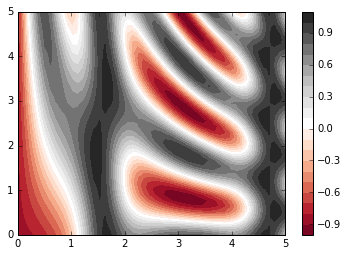

In [32]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

#### 7.4 用函数 plt.imshow 创建影像图（自查自学）

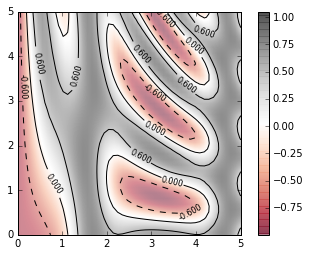

In [33]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar()

### 8 直方图和分箱图

#### 8.1 一维直方图

C:\qycache\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


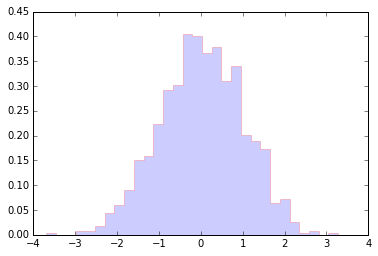

In [15]:
data = np.random.randn(1000)
plt.hist(data, bins=30, normed=True, alpha=0.2, histtype='stepfilled', color='blue',edgecolor='red');

#### 8.2 一维直方图选项

选项

- 阶梯形式 —— histtype='stepfilled'
- 透明指标 —— alpha

两者结合，对于比较直方图的分布很有帮助

C:\qycache\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


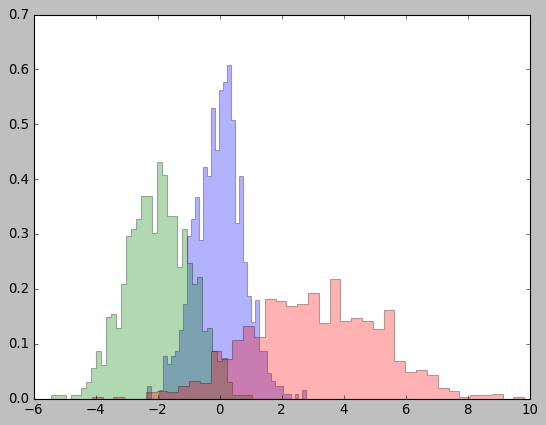

In [44]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# 参数采用字典打包
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);#柱状图的颜色为自动调节

C:\qycache\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


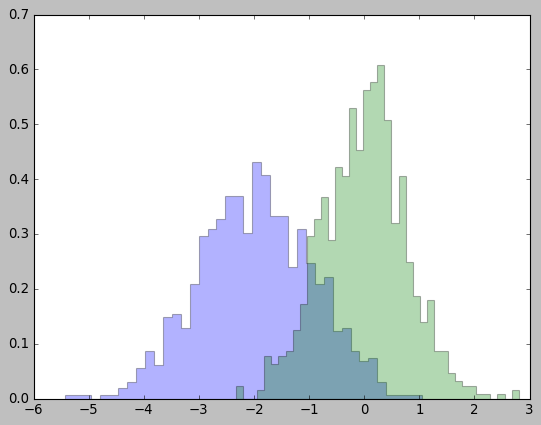

In [45]:
plt.hist(x2,**kwargs)
plt.hist(x1,**kwargs);

- ``np.histogram()`` 函数 —— 仅用于数据（分箱、频率）计算

In [16]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[  9 169 498 297  27]
[-3.69257646 -2.29757879 -0.90258111  0.49241656  1.88741424  3.28241191]


#### 8.3 二维直方图

- 创建一维直方图时，将数轴划分成箱（bins）
- 可类似创建二维直方图，对应的有二维箱（two-dimensional bins）

In [54]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T
x

array([-1.60258585,  0.67292584,  0.10373617, ...,  1.11487576,
       -0.79053394, -2.59950056])

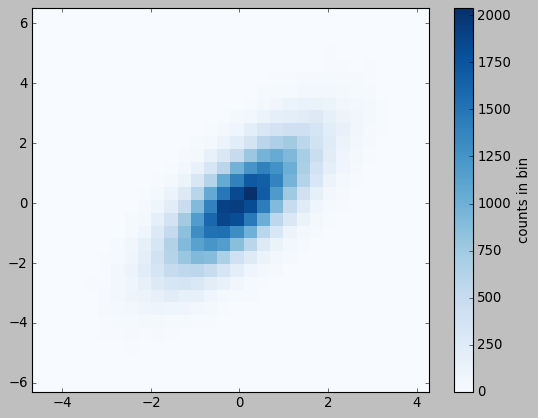

In [55]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### 9 多图

- 用于多视角观察数据
- 图网，或更复杂的布局

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### 9.1 简单子图网格 —— ``plt.subplot``

- 最常见的要求 —— 子图按行和列对齐
- 最低要求 —— ``plt.subplot()``仅创建一个子图

#### 命令参数

- 行数
- 列数
- 索引号(从左上到右下计数）

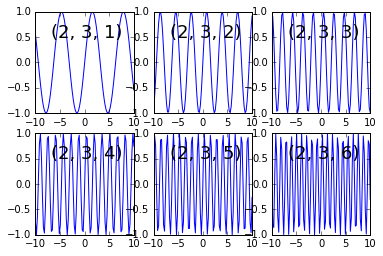

In [23]:
x = np.linspace(-10,10,100)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.plot(x, np.sin(x*i))
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

### 9.2 调整子图之间间隔（略）

- plt.subplots_adjust

### 9.3 面向对象的等效命令

- ``fig.add_subplot()``

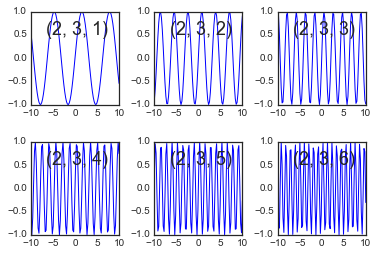

In [46]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.plot(x, np.sin(x*i))
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### 10 定制刻度

### 10.1 刻度标记和标签

- 主刻度 大刻度标记和标签
- 辅刻度 小刻度标记无标签

### 10.2 刻度属性（位置与标签）可以被定制，设置

- ``formatter`` —— 格式
- ``locator`` —— 位置

### 10.3 示例 —— 绘制正弦和余弦曲线

#### (1) 整数刻度（不合适）

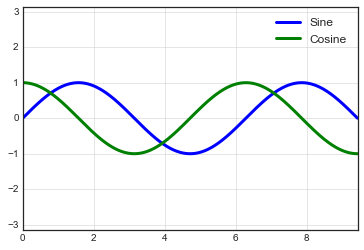

In [60]:
# 绘制正弦和余弦曲线

fig, ax = plt.subplots()

x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')#lw表示粗细
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、标签和界限bb
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

#### (2) 刻度呈现出与 $\pi$ 的比例关系（稍有进步）

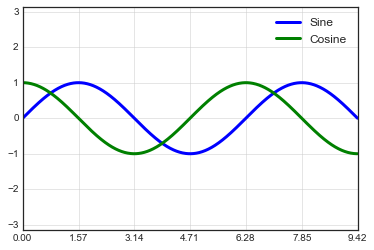

In [62]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))#设置最小间隔的值
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 2))
fig

#### (3) 解决办法

- 使用``plt.FuncFormatter``改变刻度格式
- 接受用户定义的函数更好的控制刻度输出

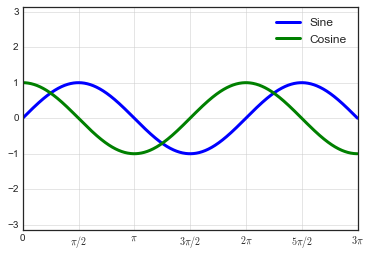

In [49]:
def format_func(value, tick_number):
    # 以 pi/2 为刻度单位
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

#### (4) 效果

- 在$\pi/4$的倍数位置，添加主和辅刻度
- 刻度和网格线以 $\pi$ 为单位，看起来更自然

### 11 三维图

- Matplotlib 最初仅为绘制二维图设计
- 随着 1.0 版问世，三维数据的可视化工具也相继推出
- 绘制三维图形要导入``mplot3d``工具盒

#### 11.1 导入模块

使用

```
%matplotlib inline
```

In [63]:
from mpl_toolkits import mplot3d
%matplotlib inline

#### 11.2 创建三维坐标系

- 三维坐标系建好后，现在可以绘制各种三维图。
- 三维图形带来的好处是交互，而不是静态的在notebook中观察。

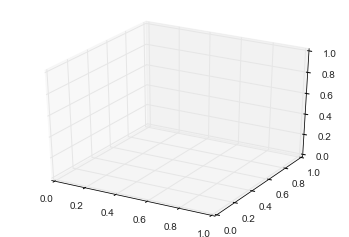

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#### 11.3 三维点图和线图

- 最基本的三维图是由三元组(x, y, z)集合创建的线图或散点图。

#### 三维绘图函数

- ``ax.plot3D``函数
- ``ax.scatter3D``函数

调用语法几乎和二维情况一致

#### 示例

绘制三角函数螺旋线

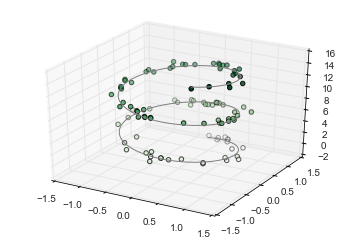

In [52]:
ax = plt.axes(projection='3d')

# 空间曲线点数据

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, 'gray')

# 三维散点数据

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

#### 11.4 绘制三维等高图

- 绘制三维正弦函数所给的三维等高图

In [72]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)#该函数将输入的一维矩阵返回为一个二维矩阵
Z = f(X, Y)
len(Y)

30

NameError: name 'add' is not defined

Text(0.5,0,'z')

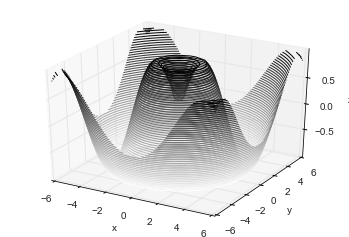

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#### 11.5 绘制线框图和曲面图

两类重要的三维图

- 网格数据参数
- 三维可视化

Text(0.5,0.92,'wireframe')

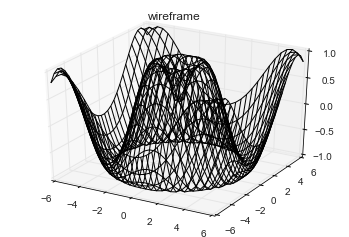

In [55]:
# 线框图
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

Text(0.5,0.92,'surface')

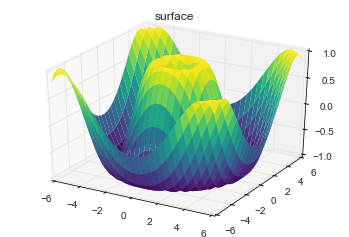

In [56]:
# 曲面图
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

#### 结束